In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
dataset = pd.read_csv("/Users/eupirate/Documents/DA_L7/L7_term3/L7_term3_ML_ARIMA_SARIMA_Churrasco.csv")
dataset.head()

,Week,Churrasco,Easter,Carnaval,Republic
0,1/31/2016,42,0,0,0
1,2/7/2016,45,0,1,0
2,2/14/2016,40,0,0,0
3,2/21/2016,36,0,0,0
4,2/28/2016,39,0,0,0


# first ARIMA Model

In [4]:
#Convert the week column into the index
dataset['Week'] = pd.to_datetime(dataset['Week'])
dataset.set_index('Week', inplace = True)

In [5]:
#Consider as a new df picking the variable we want to work with

df_churrasco = dataset[['Churrasco']]

In [6]:
# Ducky Fuller Test to check the stationarity/seasonality of the data

# H0: the data is not stationary
# H1 : the data is stationary
#alpha = 0.05

result = adfuller(df_churrasco['Churrasco'])
print('ADF statistics:', result[0])
print('p-value:', result[1])

ADF statistics: -9.24487700336238
p-value: 1.5470501981575222e-15


In [7]:
#Splitting the data into training and testing set

train_size = int(len(df_churrasco)*0.8)
train,test = df_churrasco.iloc[:train_size], df_churrasco.iloc[train_size:]

In [8]:
#Defining the ARIMA model
order_churrasco = (1, 1, 1) # (p, d, q)
model_churrasco = ARIMA(train['Churrasco'], order = order_churrasco)
results_churrasco = model_churrasco.fit()

/Users/eupirate/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [9]:
#Forecasting for the testing size
forecast_steps_test = len(test)
forecast_churrasco_test = results_churrasco.get_forecast(steps = forecast_steps_test)
forecast_values_test = forecast_churrasco_test.predicted_mean
forecast_values_test.index = test.index

In [10]:
#We will make predictions for the next 10 weeks

forecast_steps_10 = 10
forecast_churrasco_10 = results_churrasco.get_forecast(steps= forecast_steps_10)
forecast_df_10 = pd.DataFrame({
    'Forecast': forecast_churrasco_10.predicted_mean.round() #churrasco variable is whole number
})
forecast_df_10.index = pd.date_range(start = test.index[-1] + pd.Timedelta(days = 7), periods = forecast_steps_10, freq= 'W')

In [11]:
#We can calculate the MAPE (performance of the model, if it is close to zero is better)

#To avoid issues dividing something by zero, we need to do some extra step

non_zero_test = test['Churrasco'] !=0
filtered_test = test['Churrasco'][non_zero_test]
filtered_forecast = forecast_values_test[non_zero_test]
mape = np.mean(np.abs((filtered_test - filtered_forecast)/filtered_test))*100
mape

14.117162177682541

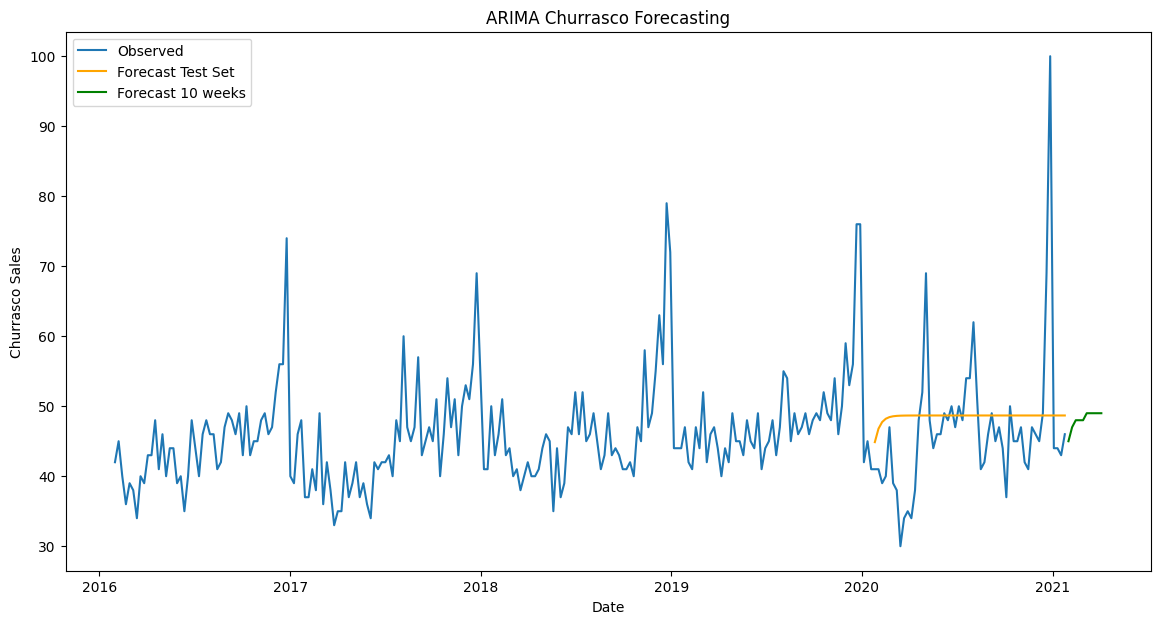

In [12]:
#Plotting the results and the data

plt.figure(figsize=(14,7))

#Observed values and forecast for the test set
plt.plot(df_churrasco.index, df_churrasco['Churrasco'], label = 'Observed')
plt.plot(forecast_values_test.index, forecast_values_test, label = 'Forecast Test Set', color = 'orange')

#Forecast for the next 10 weeks
plt.plot(forecast_df_10.index, forecast_df_10['Forecast'], label = 'Forecast 10 weeks', color = 'green')

plt.title('ARIMA Churrasco Forecasting')
plt.xlabel('Date')
plt.ylabel('Churrasco Sales')
plt.legend()
plt.show()

In [13]:
forecast_df_10

,Forecast
2021-01-31,45.0
2021-02-07,47.0
2021-02-14,48.0
2021-02-21,48.0
2021-02-28,48.0
2021-03-07,49.0
2021-03-14,49.0
2021-03-21,49.0
2021-03-28,49.0
2021-04-04,49.0


# next SARIMAX Model

In [15]:
#Defining the SARIMAX model
order_churrasco = (1,1,1) #p, d, q --> as in the ARIMA model
seasonal_order_churrasco = (1, 1, 1, 52) #we have the SARIMAX parameters (P, D, Q, S --> season)

In [16]:
model_churrasco = SARIMAX(train['Churrasco'], order = order_churrasco, seasonal_order = seasonal_order_churrasco)
results_churrasco = model_churrasco.fit()

/Users/eupirate/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35146D+00    |proj g|=  1.69656D-01

At iterate    5    f=  2.29496D+00    |proj g|=  1.99711D-02

At iterate   10    f=  2.29144D+00    |proj g|=  1.10811D-02

At iterate   15    f=  2.29072D+00    |proj g|=  9.46054D-04

At iterate   20    f=  2.29070D+00    |proj g|=  4.66265D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   2.383D-06   2.291D+00
  F =   2.2907048446488574     

CONVERG

In [17]:
#Forecasting for the testing set

forecast_steps_test = len(test)
forecast_churrasco_test = results_churrasco.get_forecast(steps = forecast_steps_test)
forecast_values_test = forecast_churrasco_test.predicted_mean
forecast_values_test.index = test.index

In [18]:
#Forecasting for the next 10 weeks
forecast_steps_10 = 10
forecast_churrasco_10 = results_churrasco.get_forecast(steps = forecast_steps_10)
forecast_df_10 = pd.DataFrame({
    'Forecast': forecast_churrasco_10.predicted_mean.round()
})
forecast_df_10.index = pd.date_range(start = test.index[-1] + pd.Timedelta(days = 7), periods = forecast_steps_10, freq = 'W')

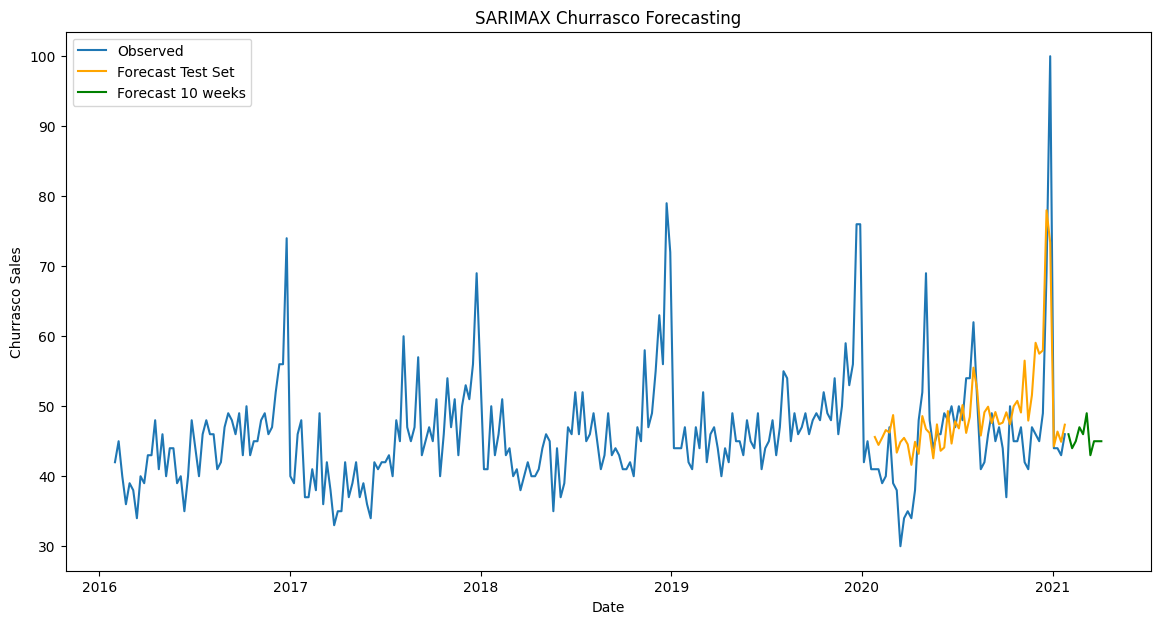

In [19]:
#Calculating MAPE
#We need to avoid dividing by zero

non_zero_test = test['Churrasco'] !=0
filtered_test = test['Churrasco'][non_zero_test]
filtered_forecast = forecast_values_test[non_zero_test]
mape = np.mean(np.abs((filtered_test - filtered_forecast)/filtered_test))*100
mape#Plotting the results

plt.figure(figsize=(14,7))

#Observed values and forecast for the test set
plt.plot(df_churrasco.index, df_churrasco['Churrasco'], label = 'Observed')
plt.plot(forecast_values_test.index, forecast_values_test, label = 'Forecast Test Set', color = 'orange')

#Forecast for the next 10 weeks
plt.plot(forecast_df_10.index, forecast_df_10['Forecast'], label = 'Forecast 10 weeks', color = 'green')

plt.title('SARIMAX Churrasco Forecasting')
plt.xlabel('Date')
plt.ylabel('Churrasco Sales')
plt.legend()
plt.show()

In [20]:
#Display the table results
forecast_df_10

,Forecast
2021-01-31,46.0
2021-02-07,44.0
2021-02-14,45.0
2021-02-21,47.0
2021-02-28,46.0
2021-03-07,49.0
2021-03-14,43.0
2021-03-21,45.0
2021-03-28,45.0
2021-04-04,45.0
